In [5]:
ls

Preprocess.ipynb  README.md  data/  requirements.txt


In [35]:
import os
import mne
import shutil
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [36]:
#os.chdir("42_Total_perspective_vortex")

if not os.path.exists('data'):
    os.makedirs('data')

In [45]:
# URL del archivo a descargar
url = "https://physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf.event?download"
local_filename = "data/S001R01.event.edf"

if not os.path.exists(local_filename):
	response = requests.get(url, stream=True)

	if response.status_code == 200:
		with open(local_filename, 'wb') as file:
			for chunk in response.iter_content(chunk_size=8192):
				if chunk:
					file.write(chunk)
		print(f"Archivo descargado correctamente como {local_filename}")
	else:
		print(f"Error en la descarga. Status code: {response.status_code}")


Archivo descargado correctamente como data/S001R01.event.edf


Extracting EDF parameters from c:\Users\Iban\Dropbox\42urduliz\cursus\42_Total_perspective_vortex\data\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


<Figure size 640x480 with 0 Axes>

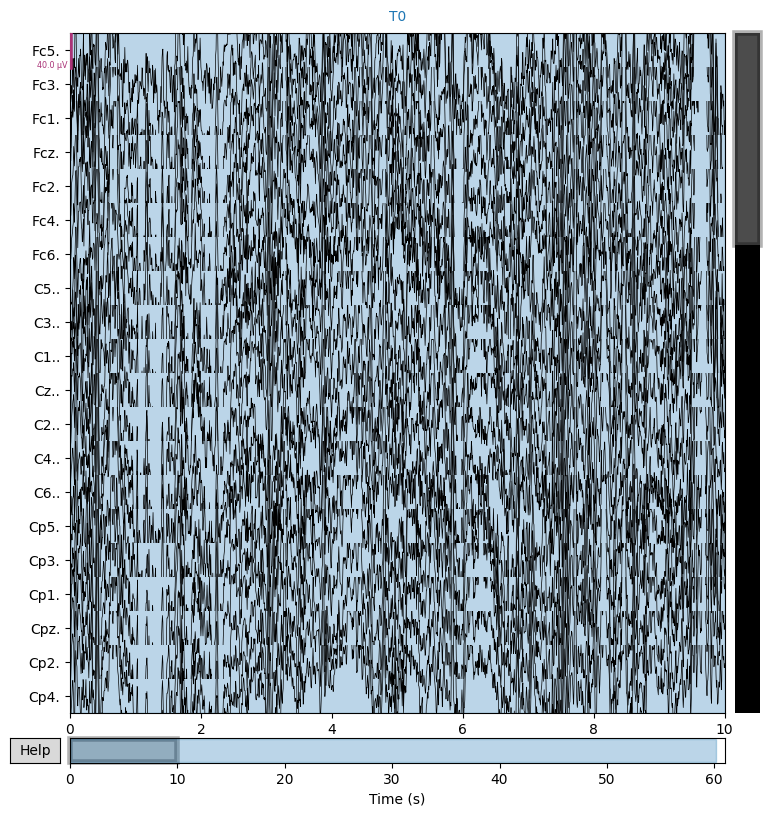

In [47]:
path = "data/S001R01.edf"
raw_data = mne.io.read_raw_edf(path, preload=True)
fig = raw_data.plot()

plt.savefig('eeg_plot.png')

In [48]:
# Extraer los eventos de las anotaciones
events, event_id = mne.events_from_annotations(raw_data)

# Mostrar los eventos y sus identificadores
print(events[:])  # Mostrar los primeros 10 eventos
print(event_id)     # Mostrar el diccionario de eventos

Used Annotations descriptions: ['T0']
[[0 0 1]]
{'T0': 1}


In [49]:
display(raw_data)

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [27]:
data, times = raw_data[:]

df = pd.DataFrame(data.T, columns=raw_data.ch_names)
df['Time'] = times

          Fc5.      Fc3.      Fc1.      Fcz.      Fc2.      Fc4.      Fc6.  \
0    -0.000016 -0.000029  0.000002  0.000022 -0.000012 -0.000023 -0.000046   
1    -0.000056 -0.000054 -0.000027 -0.000004 -0.000031 -0.000036 -0.000056   
2    -0.000055 -0.000055 -0.000029 -0.000005 -0.000029 -0.000034 -0.000052   
3    -0.000050 -0.000044 -0.000013  0.000013 -0.000016 -0.000025 -0.000045   
4    -0.000036 -0.000028  0.000013  0.000042  0.000009 -0.000010 -0.000046   
...        ...       ...       ...       ...       ...       ...       ...   
9755  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9756  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9757  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9758  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9759  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          C5..      C3..      C1..  ...      Po7.      Po3.    

In [29]:
print(df.columns)

Index(['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..',
       'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.',
       'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.',
       'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..',
       'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.',
       'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..',
       'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..',
       'Iz..', 'Time'],
      dtype='object')


In [30]:
display(df.describe())

Fc5.          Fc3.         Fc1.         Fcz.         Fc2.  \
count  9.760000e+03  9.760000e+03  9760.000000  9760.000000  9760.000000   
mean  -7.604508e-07  2.040061e-06     0.000002     0.000003     0.000001   
std    5.759029e-05  5.650740e-05     0.000057     0.000056     0.000054   
min   -2.320000e-04 -2.330000e-04    -0.000231    -0.000238    -0.000238   
25%   -3.100000e-05 -3.100000e-05    -0.000032    -0.000031    -0.000032   
50%   -1.000000e-06  5.000000e-07     0.000001     0.000002     0.000001   
75%    2.700000e-05  3.300000e-05     0.000033     0.000036     0.000033   
max    3.970000e-04  3.100000e-04     0.000281     0.000257     0.000249   

              Fc4.         Fc6.         C5..         C3..          C1..  ...  \
count  9760.000000  9760.000000  9760.000000  9760.000000  9.760000e+03  ...   
mean      0.000003     0.000002    -0.000002     0.000002  1.868852e-07  ...   
std       0.000049     0.000044     0.000054     0.000052  5.299694e-05  ...   
min      -0.000227    -0.000222    -0.000190    -0.000207 -2.010000e-04  ...   
25%      -0.000026    -0.000025    -0.000035    -0.000029 -3.300000e-05  ...   
50%       0.000003     0.000001    -0.000003     0.000001  0.000000e+00  ...   
75%       0.000032     0.000027     0.000029     0.000032  3.100000e-05  ...   
max       0.000229     0.000244     0.000350     0.000269  2.440000e-04  ...   

               Po7.         Po3.          Poz.         Po4.         Po8.  \
count  9.760000e+03  9760.000000  9.760000e+03  9760.000000  9760.000000   
mean   7.867828e-07    -0.000002 -2.841189e-07     0.000001     0.000001   
std    4.955531e-05     0.000052  5.393395e-05     0.000048     0.000046   
min   -2.000000e-04    -0.000205 -1.970000e-04    -0.000187    -0.000206   
25%   -3.100000e-05    -0.000035 -3.500000e-05    -0.000030    -0.000029   
50%    0.000000e+00    -0.000002  0.000000e+00     0.000000     0.000000   
75%    3.000000e-05     0.000029  3.300000e-05     0.000031     0.000030   
max    2.650000e-04     0.000259  2.490000e-04     0.000210     0.000232   

               O1..         Oz..          O2..          Iz..         Time  
count  9.760000e+03  9760.000000  9.760000e+03  9.760000e+03  9760.000000  
mean  -6.304303e-07    -0.000001 -3.248975e-07 -5.687500e-07    30.496875  
std    5.225860e-05     0.000051  5.649575e-05  5.181206e-05    17.610085  
min   -2.390000e-04    -0.000213 -2.160000e-04 -1.920000e-04     0.000000  
25%   -3.400000e-05    -0.000034 -3.800000e-05 -3.500000e-05    15.248437  
50%   -1.000000e-06    -0.000001 -2.000000e-06 -2.000000e-06    30.496875  
75%    3.000000e-05     0.000030  3.600000e-05  3.100000e-05    45.745312  
max    2.620000e-04     0.000264  2.270000e-04  2.310000e-04    60.993750  

[8 rows x 65 columns]

<Figure size 640x480 with 0 Axes>

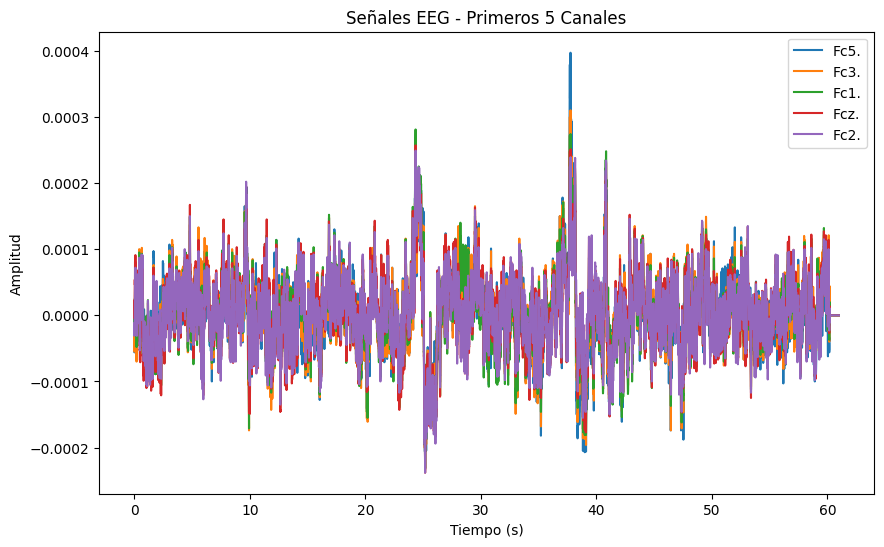

In [31]:
# Graficar los primeros 5 canales de EEG a lo largo del tiempo
df.plot(x='Time', y=df.columns[:5], figsize=(10, 6))
plt.title('Señales EEG - Primeros 5 Canales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

In [32]:
# Mostrar las anotaciones (eventos) presentes en los datos
annotations = raw_data.annotations
print(annotations)


<Annotations | 1 segment: T0 (1)>


In [33]:
# Extraer los eventos de las anotaciones
events, event_id = mne.events_from_annotations(raw_data)

# Mostrar los eventos y sus identificadores
print(events[:10])  # Mostrar los primeros 10 eventos
print(event_id)     # Mostrar el diccionario de eventos


Used Annotations descriptions: ['T0']
[[0 0 1]]
{'T0': 1}


C:\Users\Iban\AppData\Roaming\Python\Python311\site-packages\mne\viz\misc.py:888: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlabel=xlabel, ylabel="Event id", xlim=[0, max_x])


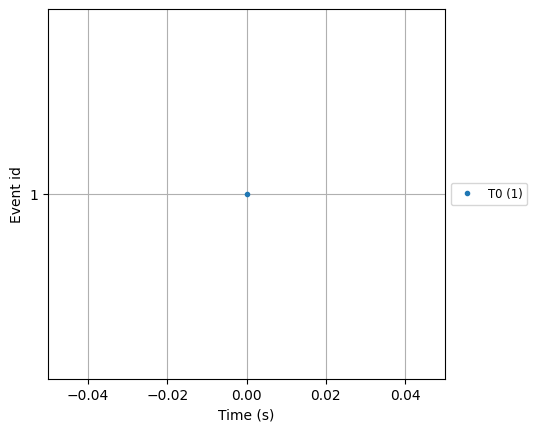

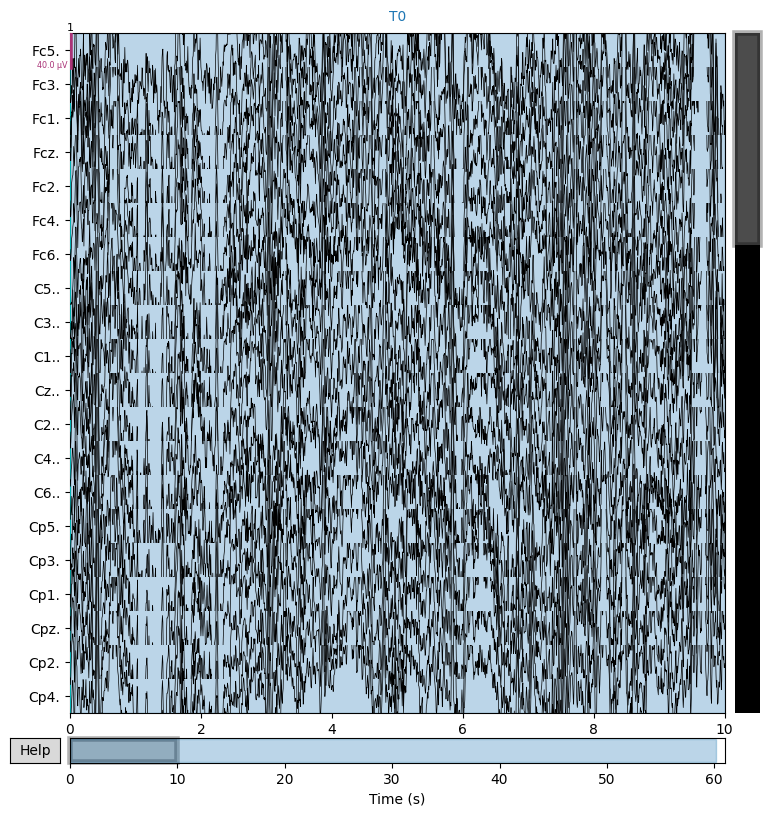

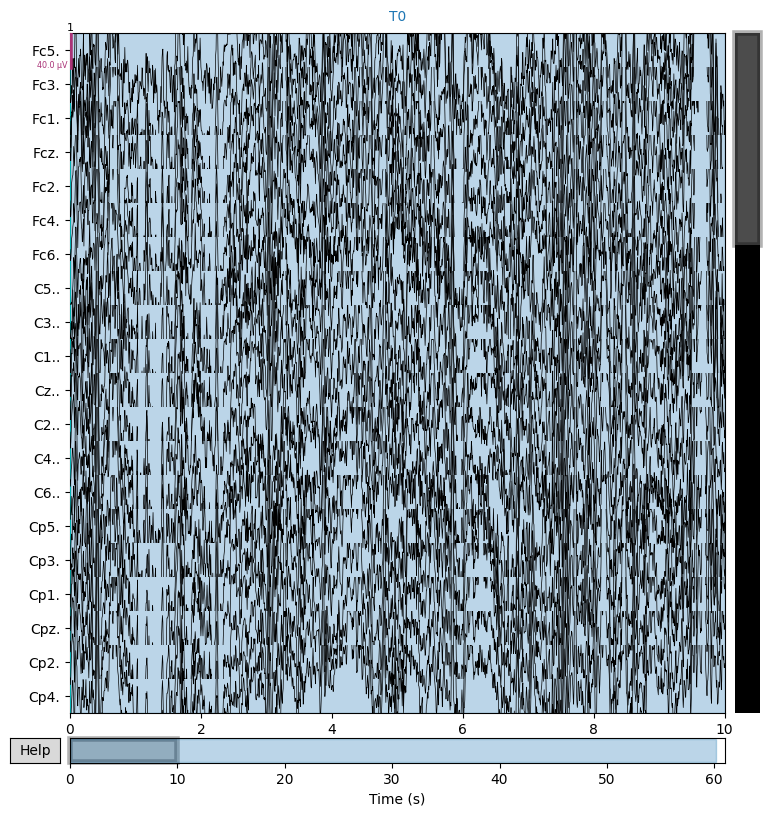

In [34]:
# Graficar los datos de EEG con los eventos marcados
mne.viz.plot_events(events, raw_data.info['sfreq'], raw_data.first_samp, event_id=event_id)
raw_data.plot(events=events)


The human brain operates across a wide range of frequencies, with different types of brain waves associated with different states of consciousness and cognitive functions. Here are the most common brain wave frequencies:

Delta Waves (0.5 - 4 Hz)

Associated States: Deep sleep, unconsciousness
Characteristics: Delta waves are the slowest brain waves and are primarily observed during deep, restorative sleep (Stages 3 and 4 of NREM sleep). They are associated with the body's healing and regeneration processes.
Theta Waves (4 - 8 Hz)

Associated States: Light sleep, relaxation, meditation, creativity
Characteristics: Theta waves are slower than alpha waves and are typically observed during light sleep (Stage 1 and 2 of NREM sleep) and deep meditation. They are associated with creativity, intuition, and relaxation.
Alpha Waves (8 - 12 Hz)

Associated States: Relaxed wakefulness, calmness, reflection
Characteristics: Alpha waves are present during relaxed, wakeful states when the eyes are closed and the mind is calm. They are often observed during moments of quiet reflection and relaxation.
Beta Waves (12 - 30 Hz)

Associated States: Active thinking, focus, alertness, problem-solving
Characteristics: Beta waves are fast brain waves associated with active, engaged mental states such as problem-solving, decision-making, and focused attention. High levels of beta wave activity can be associated with stress and anxiety.
Gamma Waves (30 - 100 Hz)

Frequency Range: 30 to 100 Hz
Associated States: High-level cognitive functioning, information processing, learning
Characteristics: Gamma waves are the fastest brain waves and are involved in high-level cognitive functions such as perception, consciousness, information processing, and learning. They are also linked to the integration of information across different brain regions.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<Figure size 640x480 with 0 Axes>

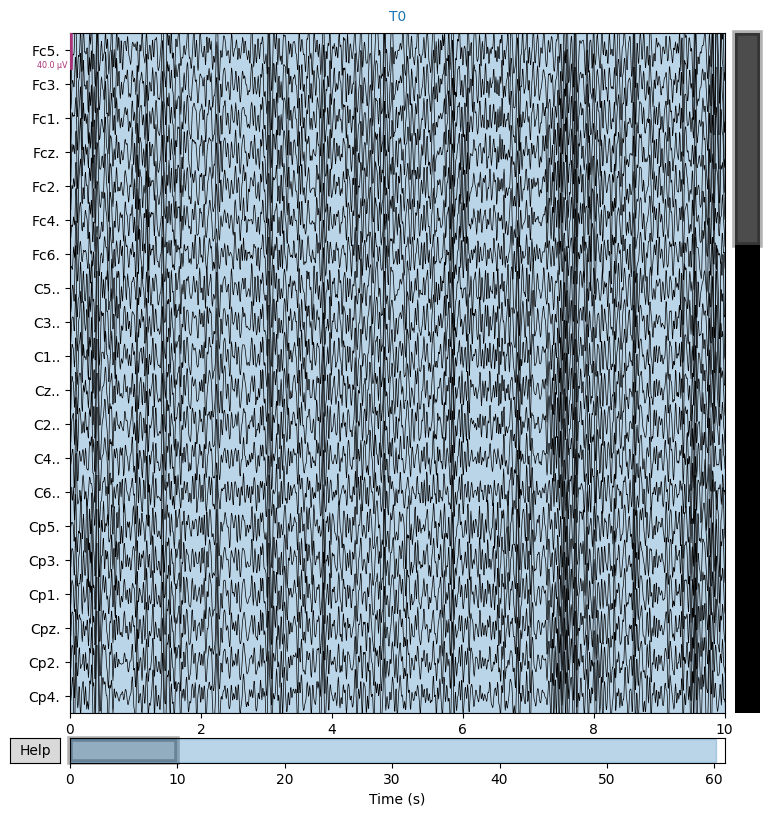

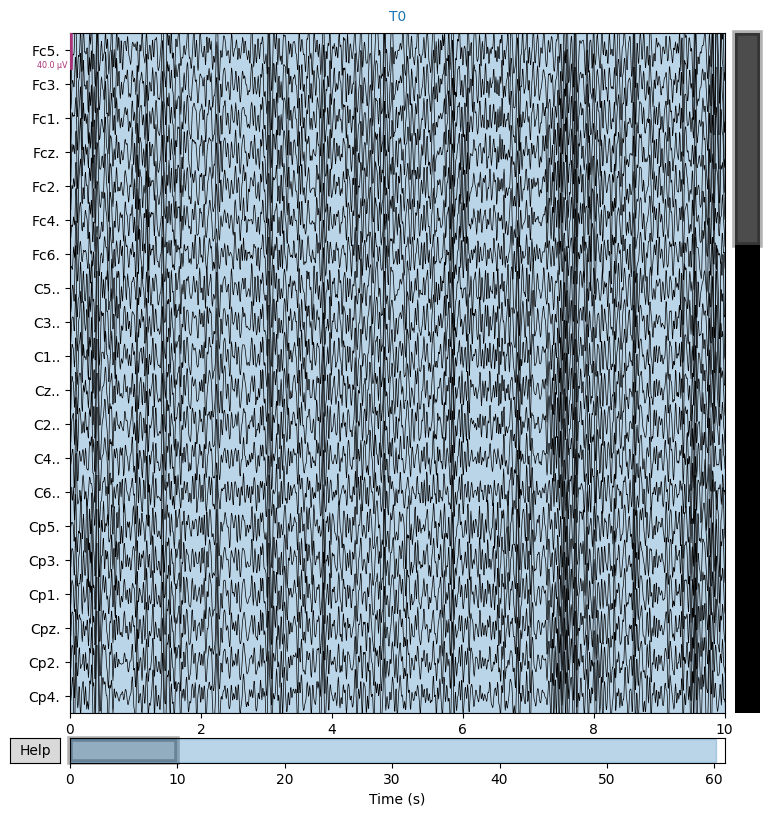

In [15]:
# Filtrar los datos para conservar solo las frecuencias entre 8 y 30 Hz (bandas mu y beta)
raw_filtered = raw_data.filter(l_freq=8, h_freq=30)

# Visualizar los datos filtrados
raw_filtered.plot()


Transformada de Fourier y Trasformada Wavelet

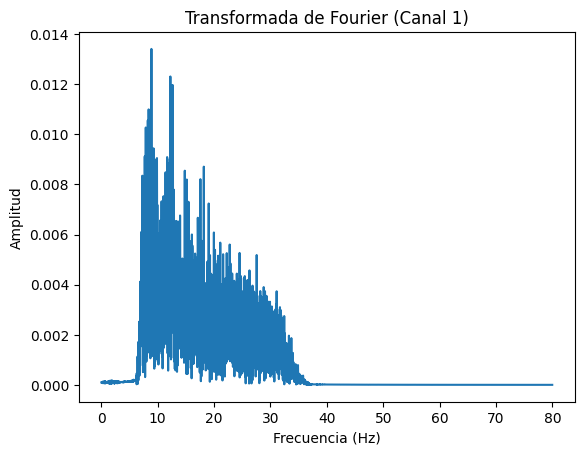

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los datos crudos del EEG
eeg_data, times = raw_filtered[:]

# Aplicar FFT a uno de los canales (por ejemplo, el primer canal)
fft_data = np.fft.fft(eeg_data[0])

# Obtener las frecuencias correspondientes
freqs = np.fft.fftfreq(len(fft_data), 1 / raw_filtered.info['sfreq'])

# Graficar la Transformada de Fourier (solo frecuencias positivas)
plt.plot(freqs[:len(freqs)//2], np.abs(fft_data)[:len(freqs)//2])
plt.title('Transformada de Fourier (Canal 1)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Applying baseline correction (mode: logratio)


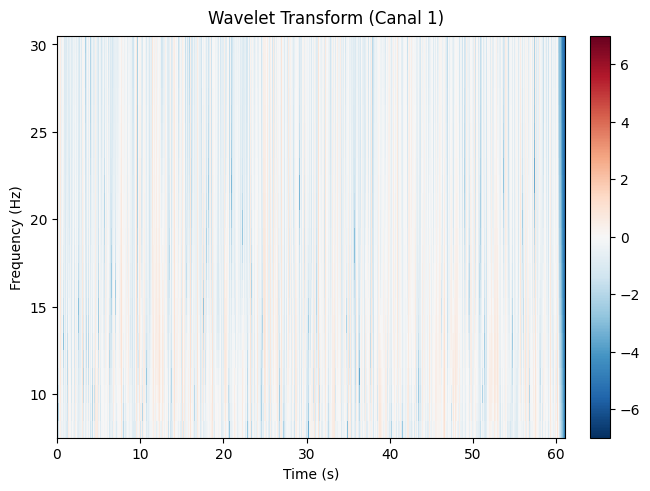

[<Figure size 640x480 with 2 Axes>]

In [18]:

# Definir las frecuencias de interés para el análisis wavelet
frequencies = np.arange(8, 31, 1)  # De 8 a 30 Hz

# Aplicar la Transformada Wavelet
power = mne.time_frequency.tfr_morlet(raw_filtered, freqs=frequencies, n_cycles=2, use_fft=True, return_itc=False)

# Graficar el espectrograma para uno de los canales (por ejemplo, el canal 1)
power.plot([0], baseline=(None, 0), mode='logratio', title='Wavelet Transform (Canal 1)')
